In [1]:
import pandas as pd
import datetime
from datetime import datetime

In [2]:
df_1 = pd.read_csv('logs.csv', sep = ',', )

In [3]:
df_1 ['time_s'] = pd.to_datetime(df_1.time, unit='s')

In [4]:
df_2 = pd.read_csv('user_data.csv', sep = ',')

__Проверим размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику__

In [102]:
def first_check(dataset):

    print()
    print('Информация о таблице')   
    print(dataset.info())

    print()
    print('Характеристики чисел в таблице')  
    display(dataset.describe())

In [33]:
first_check(df_1)


Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   client    4500 non-null   int64         
 1   success   4500 non-null   bool          
 2   platform  4500 non-null   object        
 3   time      4500 non-null   object        
 4   time_s    4500 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 145.1+ KB
None

Характеристики чисел в таблице


,client
count,4500.000000
mean,50998.758000
std,28374.472495
min,40.000000
25%,27056.500000
50%,52659.000000
75%,76001.250000
max,99993.000000


In [34]:
first_check(df_2)


Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB
None

Характеристики чисел в таблице


,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [86]:
total_df = df_1.merge(df_2, how = 'outer')

In [87]:
total_df

,client,success,platform,time,time_s,premium,age
0,40177,True,phone,1585412212,2020-03-28 16:16:52,NaN,NaN
1,61468,True,phone,1585425658,2020-03-28 20:00:58,False,25.0
2,61468,True,computer,1585460504,2020-03-29 05:41:44,False,25.0
3,61468,True,computer,1585430291,2020-03-28 21:18:11,False,25.0
4,61468,True,computer,1585444317,2020-03-29 01:11:57,False,25.0
...,...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,2020-03-29 05:17:52,False,66.0
4496,73299,True,phone,1585458370,2020-03-29 05:06:10,NaN,NaN
4497,8967,True,phone,1585465121,2020-03-29 06:58:41,False,33.0
4498,52880,False,phone,1585455362,2020-03-29 04:16:02,NaN,NaN


In [84]:
total_df = total_df.fillna(0)
total_df

,client,success,platform,time,time_s,premium,age
0,40177,True,phone,1585412212,2020-03-28 16:16:52,0,0
1,61468,True,phone,1585425658,2020-03-28 20:00:58,False,25
2,61468,True,computer,1585460504,2020-03-29 05:41:44,False,25
3,61468,True,computer,1585430291,2020-03-28 21:18:11,False,25
4,61468,True,computer,1585444317,2020-03-29 01:11:57,False,25
...,...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,2020-03-29 05:17:52,False,66
4496,73299,True,phone,1585458370,2020-03-29 05:06:10,0,0
4497,8967,True,phone,1585465121,2020-03-29 06:58:41,False,33
4498,52880,False,phone,1585455362,2020-03-29 04:16:02,0,0


In [26]:
import numpy as np

In [27]:
total_df = total_df.astype({'age': np.int64})

In [28]:
total_df

,client,success,platform,time,time_s,premium,age
0,40177,True,phone,1585412212,2020-03-28 16:16:52,0,0
1,61468,True,phone,1585425658,2020-03-28 20:00:58,False,25
2,61468,True,computer,1585460504,2020-03-29 05:41:44,False,25
3,61468,True,computer,1585430291,2020-03-28 21:18:11,False,25
4,61468,True,computer,1585444317,2020-03-29 01:11:57,False,25
...,...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,2020-03-29 05:17:52,False,66
4496,73299,True,phone,1585458370,2020-03-29 05:06:10,0,0
4497,8967,True,phone,1585465121,2020-03-29 06:58:41,False,33
4498,52880,False,phone,1585455362,2020-03-29 04:16:02,0,0


- __Посмотрим какой клиент совершил больше всего успешных операций__

In [89]:
total_df.query('success == True').client.value_counts()[:15]

61473    41
61468    41
12179    41
78349    41
82563    41
36165    41
52870    41
92584    41
28719    41
64064    40
79320     3
92743     2
75613     2
12438     2
24071     2
Name: client, dtype: int64

- __С какой платформы осуществляется наибольшее количество успешных операций?__

In [90]:
total_df.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

__Какую платформу предпочитают премиумные клиенты?__

In [91]:
total_df.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

__Какое распределение возраста клиентов в зависимости от типа клиента (премиум или нет)__

In [78]:
pivot_age = total_df.pivot_table('client', index = 'age', columns = 'premium', aggfunc = 'count').reset_index()
df_pivot_age = pd.DataFrame(pivot_age)
df_pivot_age.columns = ['age', 'Standart', 'Premium']
df_pivot_age

,age,Standart,Premium
0,0,1061.0,NaN
1,20,46.0,9.0
2,21,50.0,8.0
3,22,51.0,7.0
4,23,43.0,7.0
5,24,86.0,5.0
6,25,104.0,17.0
7,26,55.0,9.0
8,27,65.0,11.0
9,28,131.0,6.0


In [62]:
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt

__Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)__

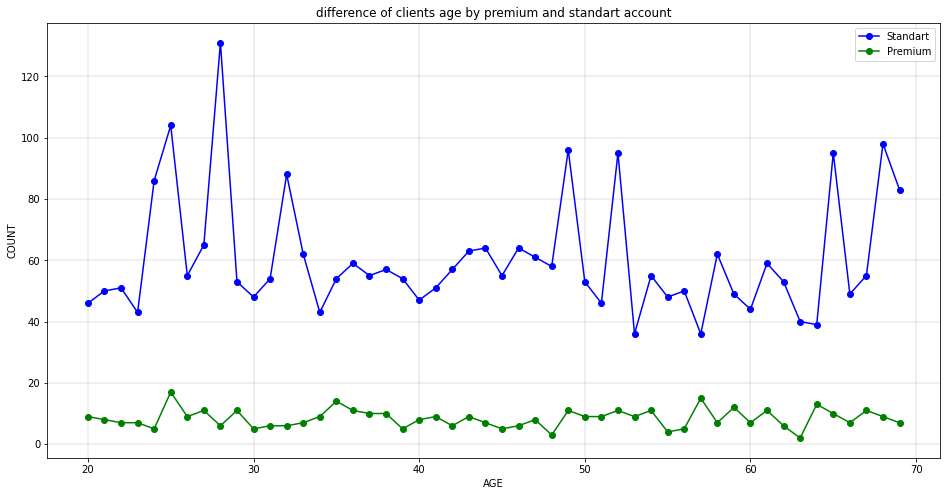

In [82]:
plt.figure(figsize = (16,8))
plt.plot(df_pivot_age['age'],pivot_age['Standart'], label = 'Standart', color = 'blue', marker = 'o' )
plt.plot(df_pivot_age['age'],pivot_age['Premium'], label = 'Premium', color = 'green', marker = 'o')
plt.title('difference of clients age by premium and standart account')
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.grid(linewidth = 0.4)
plt.legend()
plt.show()

Наглядно можем убедиться:
- большинство выбирают стандартные аккаунты (максимальное количество операций в возрасте 28 лет - 131);
- премиумных клиентов в меньшинстве (максимальное количество в возрасте 25 лет - 17)

__Расмотрим более детально число успешных операций (распределение по возрасту клиентов)__

In [83]:
df_3=total_df.query('success == True')
df_3

,client,success,platform,time,time_s,premium,age
1,61468,True,phone,1585425658,2020-03-28 20:00:58,False,25
2,61468,True,computer,1585460504,2020-03-29 05:41:44,False,25
3,61468,True,computer,1585430291,2020-03-28 21:18:11,False,25
4,61468,True,computer,1585444317,2020-03-29 01:11:57,False,25
5,61468,True,phone,1585441266,2020-03-29 00:21:06,False,25
...,...,...,...,...,...,...,...
4490,85769,True,computer,1585447052,2020-03-29 01:57:32,False,46
4492,81031,True,computer,1585401631,2020-03-28 13:20:31,False,45
4494,95152,True,computer,1585420263,2020-03-28 18:31:03,False,67
4497,8967,True,phone,1585465121,2020-03-29 06:58:41,False,33


In [84]:
count_success = df_3.pivot_table('client', index = 'age', columns = 'success', aggfunc = 'count').reset_index()
df_count_success = pd.DataFrame(count_success)
df_count_success.columns = ['age', 'count_success']
df_count_success

,age,count_success
0,20,37
1,21,46
2,22,39
3,23,42
4,24,79
5,25,93
6,26,43
7,27,46
8,28,120
9,29,42


__График распределения числа успешных операций (по возрасту клиентов)__

Text(0.5, 1.0, 'SUCCESS ORDER')

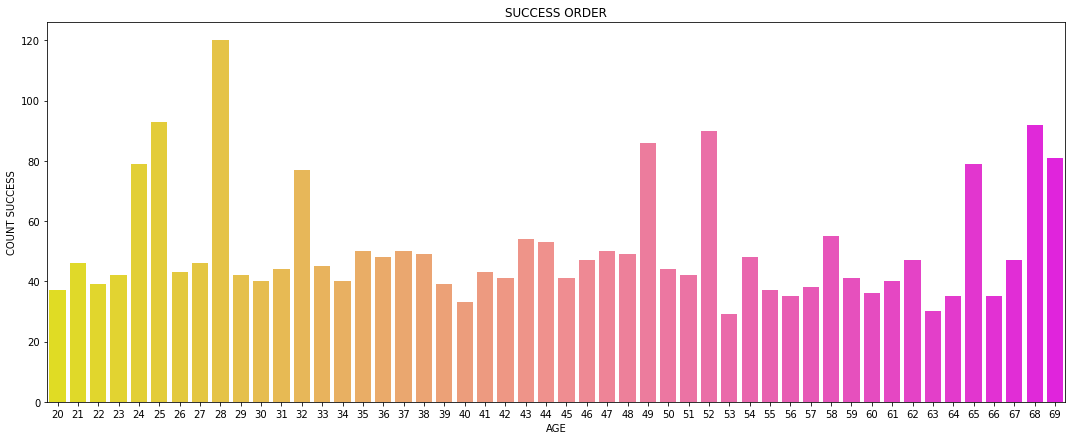

In [85]:
plt.figure(figsize = (15,6))
sns.barplot(x= 'age', y = 'count_success', data = df_count_success , palette = 'spring_r')
plt.tight_layout()
plt.xlabel('AGE')
plt.ylabel('COUNT SUCCESS')
plt.title('SUCCESS ORDER')

Мы видим следующую тенденцию: 
- вне зависимости от возраста, количество успешных операций находится в диапазоне 25-40;
- максимальное количество успешных операций в возрасте 28 лет (120);
- минимальное количество успешных операций в возрасте 53 года (29).

In [96]:
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
!pip install pingouin

  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196207 sha256=8d3e99437ede9aab18ce937730baabcae370250d137aca4292866048b78e85d2
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c0\9f\92\4c574395e1e8e5e08cf73dcb76815a7eaa62921833b6b0f6ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=e9d84c2ab7659afb0162d9a0e874c7a6943c7dd414ceb39cb9e1540ce6994f24
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils


In [86]:
df = pd.read_excel("df_ab_test.xlsx")

In [87]:
df

,data,sample
0,101.622050,test
1,97.693698,test
2,108.837310,test
3,88.519357,test
4,91.358254,test
...,...,...
795,100.974802,control
796,96.527106,control
797,109.217752,control
798,99.092552,control


__Нулевая гипотеза H0__ - разницы между средней в тестовой и контрольной группе нет.

__Альтернативная гипотеза H1__ - разница между средней есть в тестовой и контрольной группе

In [88]:
df['sample'].value_counts()

test       400
control    400
Name: sample, dtype: int64

In [89]:
df_test = df.query('sample == "test"')

In [90]:
df_control = df.query('sample == "control"')

In [91]:
df_test.data.std()

5.464846063684441

In [92]:
df_control.data.std()

5.158982487490992

<AxesSubplot:>

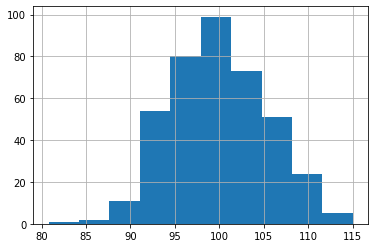

In [93]:
df_test.data.hist()

<AxesSubplot:>

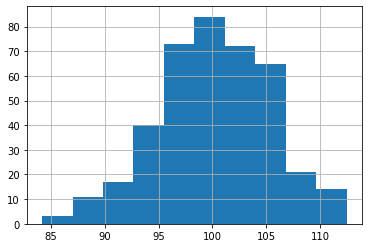

In [94]:
df_control.data.hist()

In [ ]:
#проверим на нормальность распределения тестовую группу (SHAPIRO-WILK TEST)

In [86]:
print(ss.shapiro(df_control.data.sample(200, random_state=17)))

ShapiroResult(statistic=0.9931883215904236, pvalue=0.48525094985961914)


In [87]:
print(ss.shapiro(df_test.data.sample(200, random_state=17)))

ShapiroResult(statistic=0.995566725730896, pvalue=0.8292588591575623)


Принимаем нулевую гипотезу, т.к. pvalue больше 0.05!!!

In [79]:
from scipy import stats
import scipy.stats as ss

Сравним значения в группах

In [88]:
stats.ttest_ind(df_control.data, df_test.data)

Ttest_indResult(statistic=0.7969885197879127, pvalue=0.42569475614907903)

pvalue > 0.05, значит нулевую гипотезу принимаем!!

In [ ]:
#критерием t-стьюдента смотрим есть ли различия в средних, либо нет

In [81]:
df_test.data.mean()

99.90102199376452

In [82]:
df_control.data.mean()

100.20050214288858

In [84]:
99.90102199376452/100.20050214288858

0.9970111911345814

In [85]:
0.9970111911345814-1

-0.002988808865418635

Среднее не изменилось статистически значимо

- Исходя из полученных данных, можем принять Н0 о том, что __разницы средней в тестовой и контрольной группе нет.__